# World CO2 Emissions Forecasting
<br>

*Cristian Castro Álvarez*

**Goal**: Forecast the amount of World CO2 emissions (in tonnes)

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot

## Data
- The data comes from [Our World in Data](https://github.com/owid/co2-data)

**Comments:**
- Column 'CO2' of the dataframe indicates the Tonnes of CO2 emmitted into the atmosphere.

In [2]:
df = pd.read_csv('owid-co2-data.csv')
df.head()

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [3]:
df = df.groupby(by=['year']).sum().round(1).reset_index()[['year','co2']]
df.insert(loc = 1, column = 'month', value = 12)
df.insert(loc = 2, column = 'day', value = 31)
values = pd.to_datetime(df[['year','month','day']])
df.insert(loc = 0, column = 'date', value = values)
df.drop(['year','month','day'], axis = 1, inplace = True)
df.set_index('date', inplace = True)
df.head()

,co2
date,
1750-12-31,46.8
1751-12-31,46.8
1752-12-31,46.8
1753-12-31,46.8
1754-12-31,46.8


In [4]:
df.isna().sum()

co2    0
dtype: int64

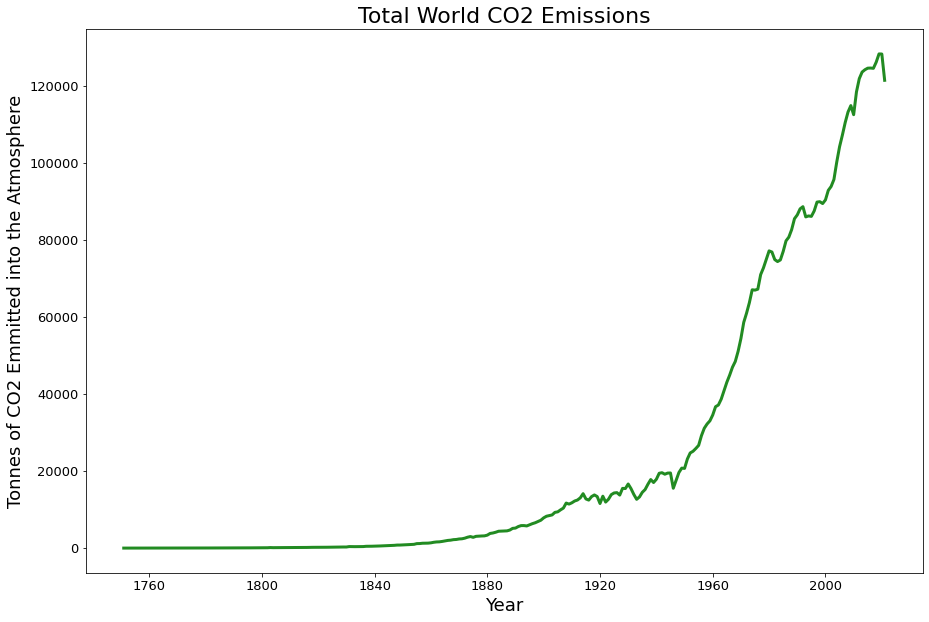

In [5]:
# Plotting trend
plt.figure(figsize = (15,10))
plt.plot(df,
         linewidth = 3,
         color = 'forestgreen')
plt.title('Total World CO2 Emissions', fontsize = 22)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Tonnes of CO2 Emmitted into the Atmosphere', fontsize = 18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

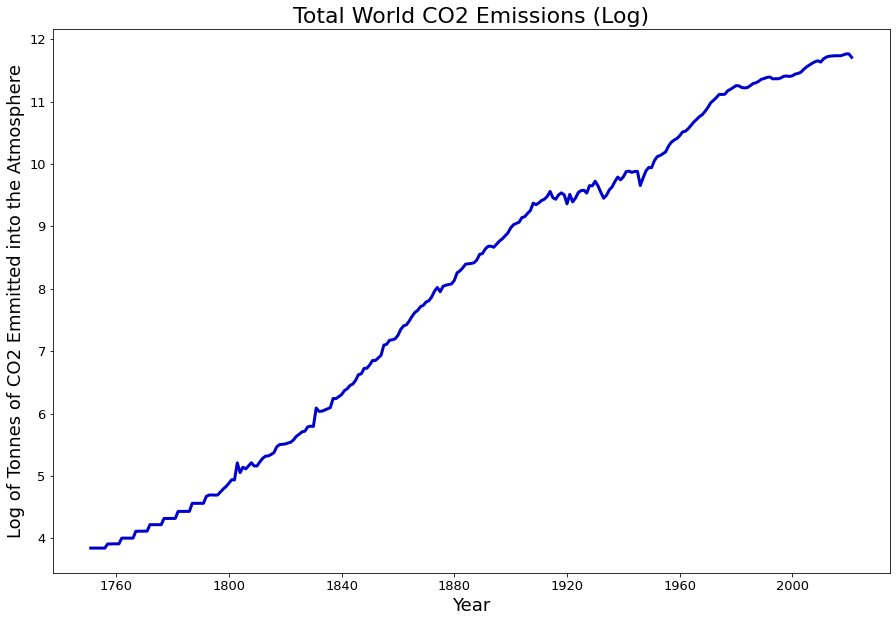

In [6]:
# Plotting trend
plt.figure(figsize = (15,10))
plt.plot(np.log(df['co2']),
         linewidth = 3,
         color = 'mediumblue')
plt.title('Total World CO2 Emissions (Log)', fontsize = 22)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Log of Tonnes of CO2 Emmitted into the Atmosphere', fontsize = 18)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

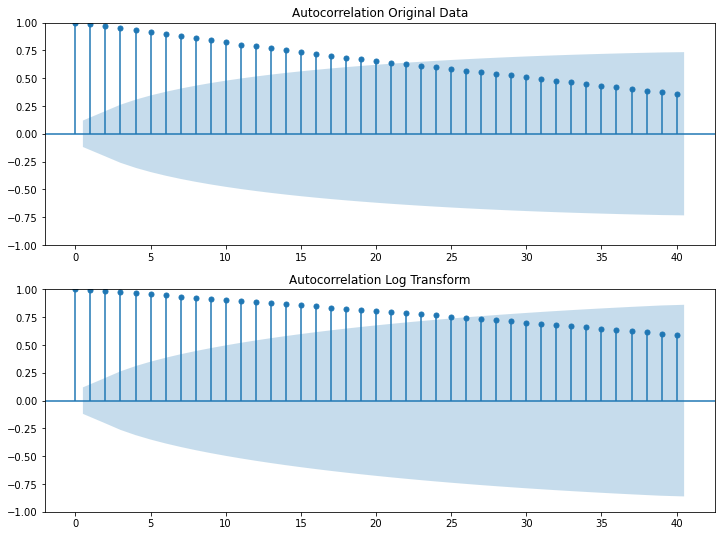

In [7]:
# Autocorrelation check
fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(211)
fig = plot_acf(x = df, 
               lags=40, 
               ax=ax1)
ax1.title.set_text('Autocorrelation Original Data')
ax2 = fig.add_subplot(212)
fig = plot_acf(x = np.log(df), 
               lags=40, 
               ax=ax2)
ax2.title.set_text('Autocorrelation Log Transform')

/Users/cristiancastro/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/cristiancastro/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


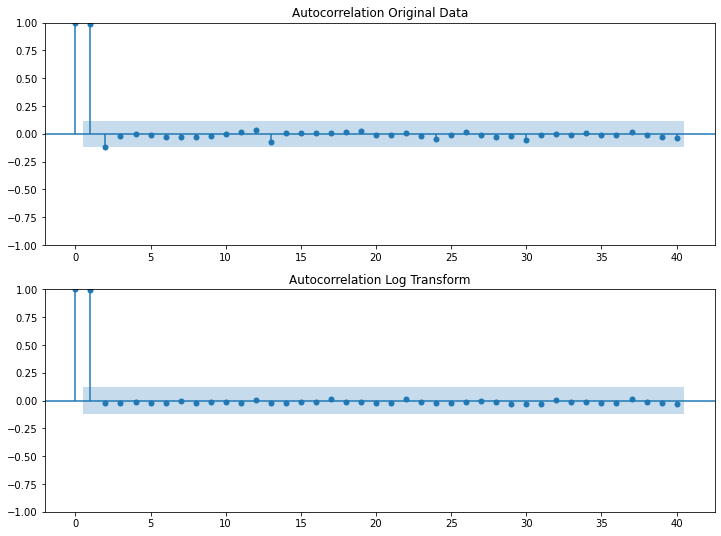

In [8]:
# Partial Autocorrelation check
fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(211)
fig = plot_pacf(x = df, 
               lags=40, 
               ax=ax1)
ax1.title.set_text('Autocorrelation Original Data')
ax2 = fig.add_subplot(212)
fig = plot_pacf(x = np.log(df), 
               lags=40, 
               ax=ax2)
ax2.title.set_text('Autocorrelation Log Transform')

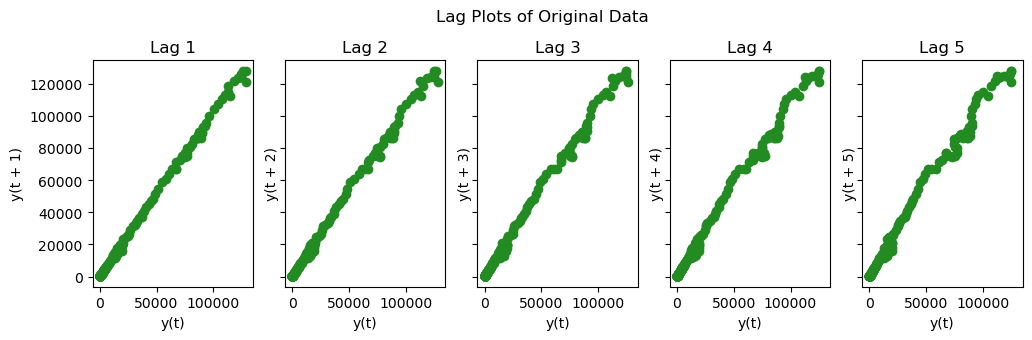

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(12,3), sharex = True, sharey = True, dpi=100)
for i, ax in enumerate(axes.flatten()[:5]):
    lag_plot(df['co2'], lag=i+1, ax=ax, c = 'forestgreen')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Original Data', y=1.05)    
plt.show()

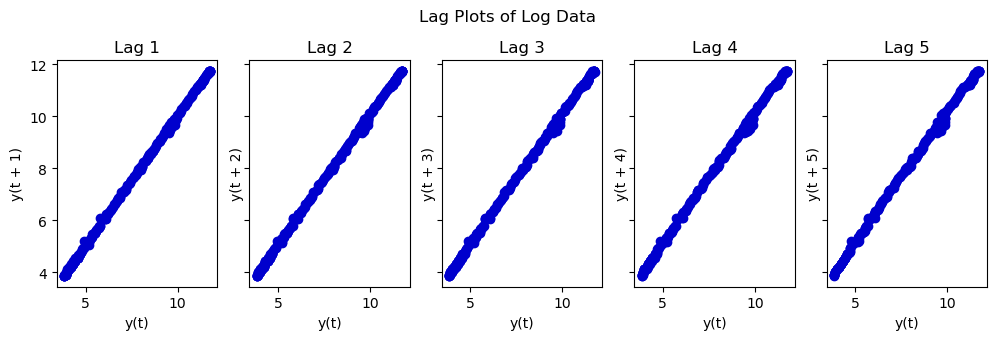

In [17]:
fig, axes = plt.subplots(1, 5, figsize=(12,3), sharex = True, sharey = True, dpi=100)
for i, ax in enumerate(axes.flatten()[:5]):
    lag_plot(np.log(df['co2']), lag=i+1, ax=ax, c = 'mediumblue')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Log Data', y=1.05)    
plt.show()

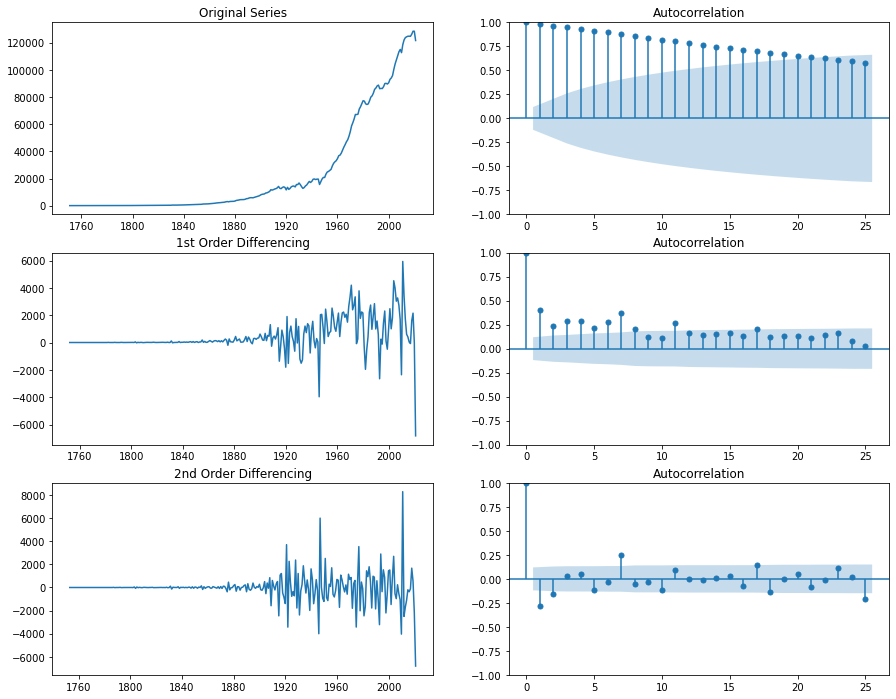

In [25]:
# Check differentiating in original data

fig, axes = plt.subplots(3, 2, figsize = (15,12))

# Original Series
axes[0, 0].plot(df['co2']); axes[0, 0].set_title('Original Series')
plot_acf(df['co2'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['co2'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['co2'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['co2'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['co2'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

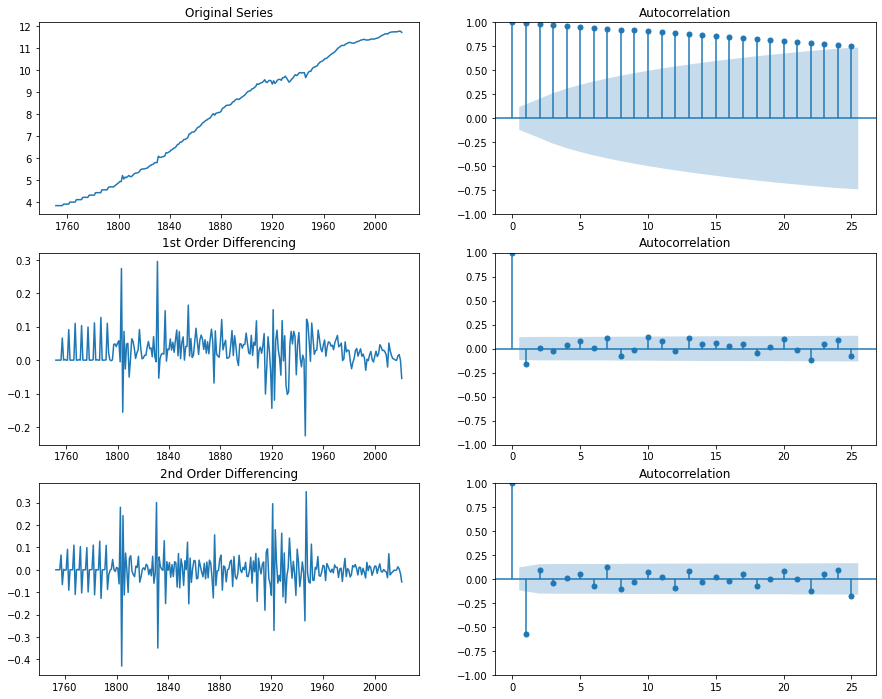

In [28]:
# Check differentiating in log data

fig, axes = plt.subplots(3, 2, figsize = (15,12))

# Original Series
axes[0, 0].plot(np.log(df['co2'])); axes[0, 0].set_title('Original Series')
plot_acf(np.log(df['co2']), ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.log(df['co2']).diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.log(df['co2']).diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(np.log(df['co2']).diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.log(df['co2']).diff().diff().dropna(), ax=axes[2, 1])

plt.show()

/Users/cristiancastro/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


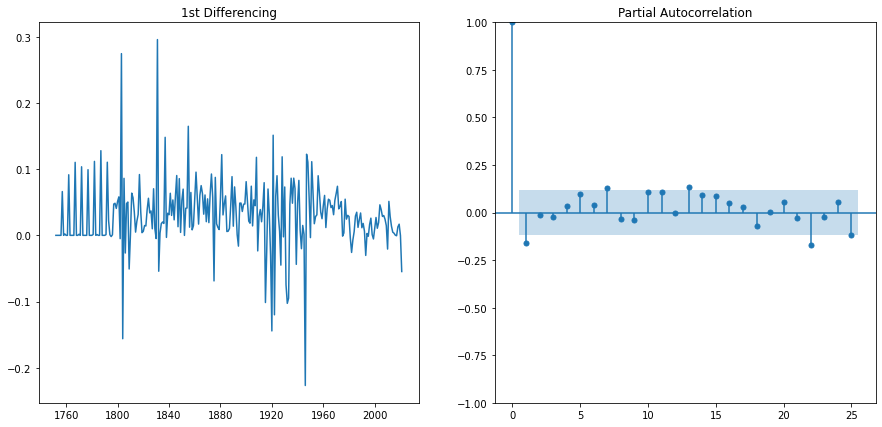

In [33]:
# Partial autocorrelation for Log Data

fig, axes = plt.subplots(1, 2, figsize = (15,7))
axes[0].plot(np.log(df['co2']).diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(np.log(df['co2']).diff().dropna(), ax=axes[1])

plt.show()